# Linear Regression with mini-batch

* y와 한 개 이상의 독립 변수 (또는 설명 변수) X와의 선형 상관 관계를 모델링하는 회귀분석 기법이다. 한 개의 설명 변수에 기반한 경우에는 단순 선형 회귀, 둘 이상의 설명 변수에 기반한 경우에는 다중 선형 회귀라고 한다. [참고: 위키피디아](https://ko.wikipedia.org/wiki/선형_회귀)

$$y_{\textrm{pred}} = \boldsymbol{W}^{\top}\boldsymbol{x} + b$$

* $\boldsymbol{x} = [x_{1}, x_{2}, \cdots, x_{d}]$
* $\boldsymbol{W} = [w_{1}, w_{2}, \cdots, w_{d}]$
* Loss function: $\mathcal{L} = \sum^{N} (y_{\textrm{pred}} - y)^{2}$

## Training Pseudo Code

```python
for epoch in max_epochs: # 1 epoch: 모든 데이터(N)를 한번 학습 시켰을 때
  for step in num_batches: # num_batches = int(data_size / batch_size)
    1. sampling mini-batches with batch_size
      1-1. data augmentation (필요하면)
    2. calculate loss
    3. calculate the gradient with respect to weights
    4. update weights
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

tf.set_random_seed(219)
np.random.seed(219)

In [2]:
tf.reset_default_graph()

## Phase 1. Build a model

### Make data

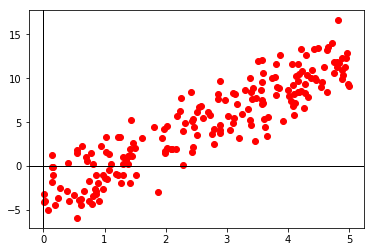

In [3]:
_a = 3
_b = -3
N = 200
data_X = np.random.uniform(low=0, high=5, size=N)
data_y = _a * data_X + _b + np.random.normal(0, 2, N)

plt.plot(data_X, data_y, 'ro')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.show()

In [4]:
data_X.shape

(200,)

### Create placeholders for inputs and labels

In [5]:
# 여기를 직접 채워 넣으시면 됩니다.
# x, y는 배치 데이터를 받을 수 있는 placeholder
# X: inputs
x = tf.placeholder(tf.float32, name='x', shape=[None])

# y: labels
y = tf.placeholder(tf.float32, name='labels', shape=[None])

### Create weight and bias

In [6]:
# 여기를 직접 채워 넣으시면 됩니다.
# create Variables using `get_variable`
W = tf.get_variable(name='weights',initializer=tf.constant(0.0))
b = tf.get_variable(name="bias", initializer=tf.constant(0.0))

### Build a model: $y = Wx + b$

In [7]:
# 여기를 직접 채워 넣으시면 됩니다.
# tf.matmul은 shape가 정해져야만 쓸 수 있다.
y_pred = W*x + b

### Define loss function

In [8]:
#tf.square(y - y_pred, name='loss')
#tf.losses.huber_loss(y, y_pred, delta=14.0)# tf.square(y - y_pred, name='loss')# tf.losses.huber_loss(y, y_pred, delta=14.0)

In [9]:
# 여기를 직접 채워 넣으시면 됩니다.
# 이번에는 Hubber loss를 직접 구현해서 넣어 봅시다.
err = y - y_pred
loss = tf.where(tf.abs(err) < 1.0,  0.5 * tf.square(err), tf.abs(err) - 0.5)

In [9]:
def huber_loss(labels, predictions, delta=1.0):
    residual = tf.abs(predictions - labels)
    print(residual)
    def f1():
        print(residual)
        print(type(residual))
        return 0.5 * tf.square(residual)
    def f2(): 
        print(residual)
        print(type(residual))
        return delta * residual - 0.5 * tf.square(delta)
    return tf.cond(tf.less(residual,delta), f1, f2)
loss = huber_loss(y, y_pred)

Tensor("Abs:0", shape=(?,), dtype=float32)


ValueError: Shape must be rank 0 but is rank 1 for 'cond/Switch' (op: 'Switch') with input shapes: [?], [?].

### Create a optimizer

In [10]:
# 여기를 직접 채워 넣으시면 됩니다.
train_op = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

## Phase 2. Train a model

### Train a model

In [ ]:
np.random.choice(np.arange(200), 8)

In [ ]:
np.random.choice(200, 8)

In [ ]:
np.random.choice(len(data_X), 8)

In [25]:
batch_size = 8

with tf.Session(config=sess_config) as sess:
    # Initialize all variables
    sess.run(tf.global_variables_initializer())
  
    writer = tf.summary.FileWriter('graphs/02_linear_reg_with_batch', sess.graph)
    writer.close()
  
    # train the model
    max_epochs = 100
    total_losses = []
    num_batches_per_epoch = int(N / batch_size)
    for epoch in range(max_epochs+1):
        total_loss = 0.0
        for step in range(num_batches_per_epoch):
            # 전체 데이터 N개중에 batch_size 만큼 데이터 random 하게 추출
            batch_index = np.random.choice(len(data_X), batch_size)
            x_ = data_X[batch_index]
            y_ = data_y[batch_index]
            # print(x_)
            # print(y_)
            # `sess.run` 부분을 직접 채워넣으시면 됩니다.
            # print(sess.run([x,y], feed_dict={x:x_, y:y_}))
            # print(sess.run(y_pred, feed_dict={x:x_, y:y_}))
            _, loss_ = sess.run([train_op, loss], feed_dict={x:x_, y:y_})
            total_loss += sum(loss_)#loss_ * batch_size
            
        total_loss /= float(N)
        total_losses.append(total_loss)  
        if epoch % 10 == 0:
            print('Epoch %d: total_loss: %f' % (epoch, total_loss))
      
    print('training done!')

    W_, b_ = sess.run([W, b])

Epoch 0: total_loss: 4.733977
Epoch 10: total_loss: 1.692681
Epoch 20: total_loss: 1.835774
Epoch 30: total_loss: 1.712214
Epoch 40: total_loss: 1.646246
Epoch 50: total_loss: 1.409379
Epoch 60: total_loss: 1.418202
Epoch 70: total_loss: 1.259097
Epoch 80: total_loss: 1.388423
Epoch 90: total_loss: 1.373027
Epoch 100: total_loss: 1.222046
training done!


### Print the results: W and b

* 정답 W = 3, b = -3

In [26]:
print(W_, b_)

2.874757 -2.3300462


### Plot the loss funtion

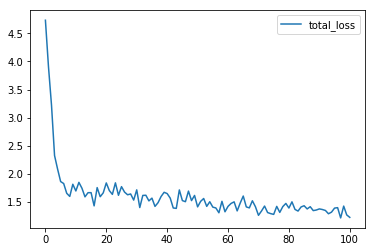

In [27]:
plt.plot(total_losses, label='total_loss')
plt.legend()
plt.show()

### Plot the results

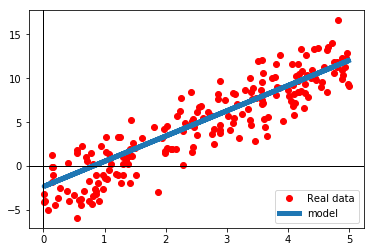

In [28]:
plt.plot(data_X, data_y, 'ro', label='Real data')
plt.plot(data_X, W_ * data_X + b_, lw=5, label='model')
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.legend()
plt.show()